In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [2]:
def lowpassfilter( x, dt, RC):
    y = np.zeros( x.shape, dtype=float)
    alpha = dt / (RC + dt)
    y[0] = alpha*x[0]
    for it in range(tmax):
        y[it] = alpha*x[it] + (1.-alpha)*y[it-1]
    return y

def highpassfilter( x, dt, tau):
    y = np.zeros( x.shape, dtype=float)
    alpha = dt / (RC + dt)
    y[0] = alpha*x[0]
    for it in range(tmax):
        y[it] = alpha*(x[it]-x[it-1]) + alpha*y[it-1]
    return y

def fsin(t, p1, p2, p3):
    return p1*np.sin(p2*t+p3)

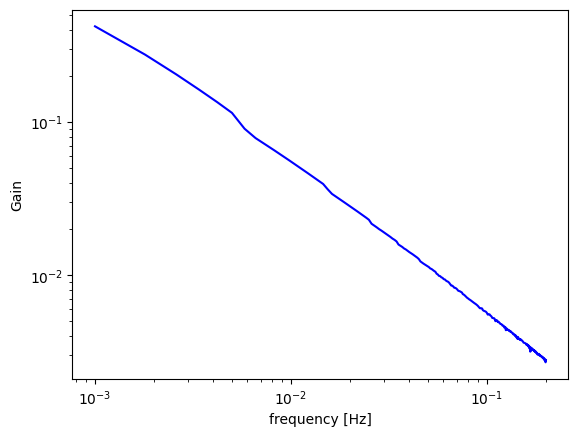

In [6]:
tmax = 10000           # time range (sec)
dt = 1.0               # time step (sec)

RC = 500.                # time constant (sec), try 2 ... 50
ampl = 1.0             # input amplitude

Nf = 250               # number of freq steps
fmin = 0.001           # minimum freq.
fstep = 0.0008         # freq. step size

tbookend = 100         # bookending transients (sec)

time = np.linspace( 1, tmax, num = tmax, dtype=int ) # time domain array
freq = np.linspace( fmin, fmin+(Nf-1)*fstep, num = Nf, dtype=float ) # freq. domain array
gain = np.zeros( (Nf), dtype=float)

for ifq in range(Nf): # loop over frequencies

    xi = np.zeros( (tmax), dtype=float) # build sinusoidal input
    for it in range(tmax):
        xi[it] = ampl*np.sin(2.*np.pi*freq[ifq]*it)

    #yi = highpassfilter(xi, dt, RC)
    yi = lowpassfilter(xi, dt, RC)
    gain[ifq] = np.amax(yi[0+tbookend:tmax-tbookend])/ampl # get bookended output amplitude

#plt.plot(time,xi,'g-')
#plt.plot(time,yi,'m-')

plt.plot(freq,gain,"b-")
plt.ylabel("Gain")
plt.xlabel("frequency [Hz]")
plt.yscale('log')
plt.xscale('log')